# Vendredi 19 Avril 

# Time Series forecasting with Facebook Prophet

## What you'll learn in this course

With Machine Learning comes very specific data: Time series. That type of data should be treated very specifically. In this course, you'll learn:

- How to handle Time Series data
- What are the common models
- Create time series forecasting with Prophet
- The model behind Prophet
- Include seasonality, holidays and other specific events in your forecast


## What are Time Series 🤔🤔

Simply put time series are data based on time. For example you can have:

- Sales forecast
- Spread of a virus over time
- Stock prices prediction
- Weather forecasting
- ...


## Models associated with Time Series 📈📈

When you are doing time series forecasting. You can use plenty different types of models. Among the most popular are:

- Moving averages
- Auto-correlations
- Autoregressive Integrated Moving Average (ARIMA)

## Facebook Prophet 🔮🔮

Prophet is an open source project used for Time Series Forecasting. Basically, Prophet rely on three components:

$y(t) = g(t) + s(t) + h(t) + \varepsilon_{t}$

where

$y(t)$ - forecast

$g(t)$ - trend

$s(t)$ - seasonality or periodical changes

$h(t)$ - holidays

$\varepsilon_{t}$ - Noise

We'll review each of these components in this course.


## Install Prophet

<Note type="warning" title="Installation and running">

The latest version of Prophet can't be installed on JULIE's workspaces. The following code examples have to be executed in [Google colab](https://colab.research.google.com/)

</Note>


## Example with Finance Data

For the rest of the course, we'll be using financial data from Yahoo and its `yfinance` library


In [1]:
# !pip install pystan~=2.14
# !pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import prophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7",
        "#4BE8E0",
        "#9DD4F3",
        "#97FBF6",
        "#2A7FAF",
        "#23B1AB",
        "#0E3449",
        "#015955",
    ]
)
# pio.templates.default = "jedha"
# pio.renderers.default = "svg"  # to be replaced by "iframe" if working on colab

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# !pip install -q yfinance

In [2]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf

# Get the data of the stock AAPL
data = yf.download("NVDA", "2022-01-01", "2024-01-01")

# Plot the close price of the AAPL
fig = px.line(x=data["Close"].index, y=data["Close"])
fig.show()

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,28.950001,29.082500,28.690001,29.037500,27.219831,115127600
2017-01-04 00:00:00-05:00,28.962500,29.127501,28.937500,29.004999,27.189367,84472400
2017-01-05 00:00:00-05:00,28.980000,29.215000,28.952499,29.152500,27.327641,88774400
2017-01-06 00:00:00-05:00,29.195000,29.540001,29.117500,29.477501,27.632296,127007600
2017-01-09 00:00:00-05:00,29.487499,29.857500,29.485001,29.747499,27.885389,134247600
...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,71.172501,71.222504,70.730003,71.067497,69.738724,48478800
2019-12-26 00:00:00-05:00,71.205002,72.495003,71.175003,72.477501,71.122360,93121200
2019-12-27 00:00:00-05:00,72.779999,73.492500,72.029999,72.449997,71.095375,146266000


Our goal is going to predict future stock prices of Apple Inc.


## Forecasting 🧙‍♂️🧙‍♂️

The best thing about Prophet is that it follows the same principles as `sklearn`. Making it very easy to use. Let's show a quick example.

First Prophet needs to receive a DataFrame with the:

- `ds` column corresponding to the time in YYYY-MM-DD format
- `y` column corresponding to your target variable


In [3]:
import pandas as pd

# Format a dataframe for Prophet where you need to have a 'ds' column for time and 'y' column for prediction

p_df = pd.DataFrame({"ds": data.index, "y": data["Open"]}).reset_index(drop=True)

p_df["ds"] = p_df["ds"].dt.tz_localize(
    None
)  # remove timezone for compatibility with latest version of fbprophet

p_df.head()

,ds,y
0,2022-01-03,298.149994
1,2022-01-04,302.769989
2,2022-01-05,289.489990
3,2022-01-06,276.399994
4,2022-01-07,281.410004


Next, we'll instanciate a `Prophet` instance and `fit` it to our DataFrame


In [4]:
from prophet import Prophet

m = Prophet()
m.fit(p_df)

11:55:57 - cmdstanpy - INFO - Chain [1] start processing
11:55:58 - cmdstanpy - INFO - Chain [1] done processing


Now we'll create predictions for future dates with Prophet


In [5]:
future = m.make_future_dataframe(periods=100)  # We create 100 more days
future

,ds
0,2022-01-03
1,2022-01-04
2,2022-01-05
3,2022-01-06
4,2022-01-07
...,...
596,2024-04-03
597,2024-04-04
598,2024-04-05
599,2024-04-06


Let's make our predictions


In [6]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
596,2024-04-03,503.949523,463.193022,538.969610,477.537817,530.162783,-3.493163,-3.493163,-3.493163,-3.493163,-3.493163,-3.493163,0.0,0.0,0.0,500.456361
597,2024-04-04,504.182869,462.440031,536.465515,477.276999,530.789698,-3.574430,-3.574430,-3.574430,-3.574430,-3.574430,-3.574430,0.0,0.0,0.0,500.608439
598,2024-04-05,504.416215,462.877561,541.780466,477.096743,531.330275,-3.342236,-3.342236,-3.342236,-3.342236,-3.342236,-3.342236,0.0,0.0,0.0,501.073979
599,2024-04-06,504.649561,473.472070,553.372887,476.990786,531.904895,9.900406,9.900406,9.900406,9.900406,9.900406,9.900406,0.0,0.0,0.0,514.549967
600,2024-04-07,504.882907,475.985395,550.926436,476.741859,532.471876,9.900419,9.900419,9.900419,9.900419,9.900419,9.900419,0.0,0.0,0.0,514.783326


And finally plot the results with plotly


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\prophet\plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



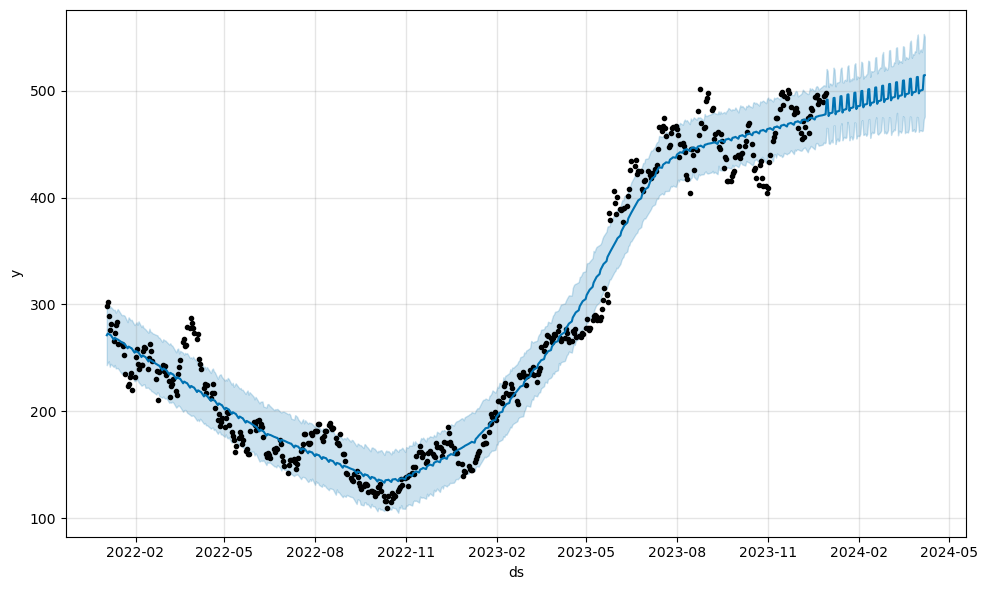

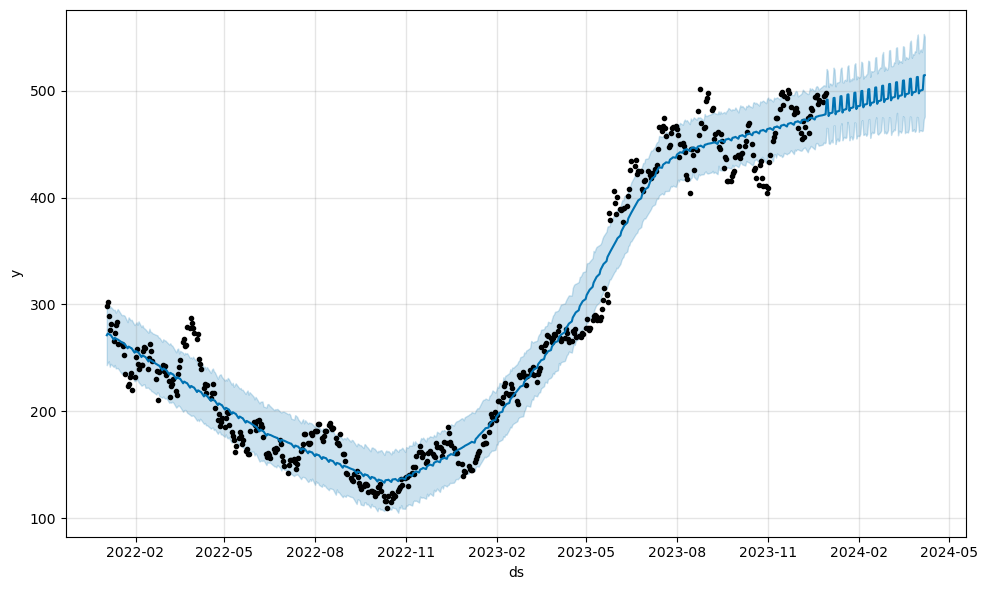

In [7]:
m.plot(forecast)

You can also plot each components of your trend. So that you can see the seasonality.


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\prophet\plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



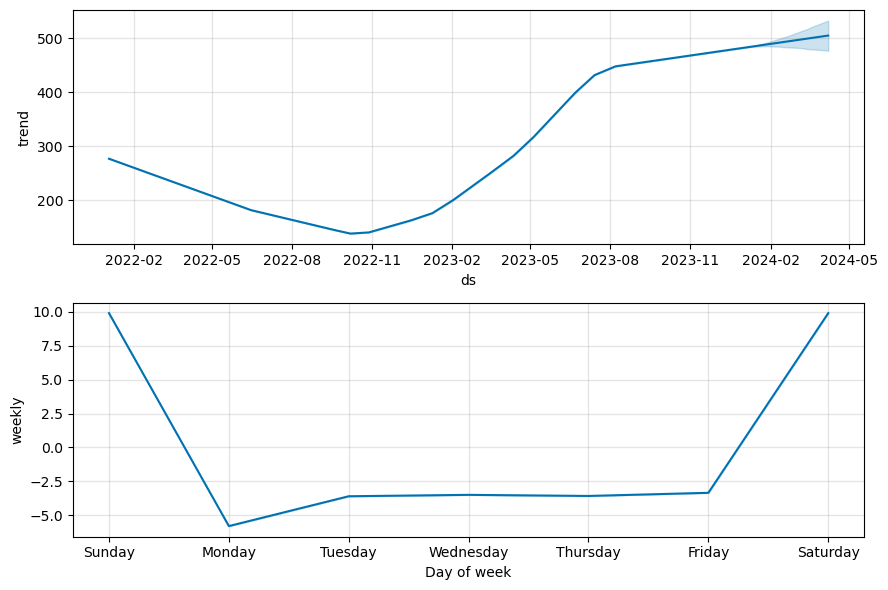

In [8]:
fig2 = m.plot_components(forecast)

## Handle Seasonality

One very cool feature that you can use with Prophet is to add seasonality. For example, you can add country holidays.


In [10]:
m = Prophet()
m.add_country_holidays(country_name="US")
m.fit(p_df)

12:00:26 - cmdstanpy - INFO - Chain [1] start processing
12:00:26 - cmdstanpy - INFO - Chain [1] done processing


Check all the added holidays


In [11]:
m.train_holiday_names

0                          Martin Luther King Jr. Day
1                               Washington's Birthday
2                                        Columbus Day
3                                      New Year's Day
4                                        Memorial Day
5                Juneteenth National Independence Day
6     Juneteenth National Independence Day (Observed)
7                                    Independence Day
8                                           Labor Day
9                                        Veterans Day
10                                       Thanksgiving
11                                      Christmas Day
12                           Christmas Day (Observed)
13                          New Year's Day (Observed)
14                            Veterans Day (Observed)
dtype: object

Check now its impact on your forecast


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\prophet\plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



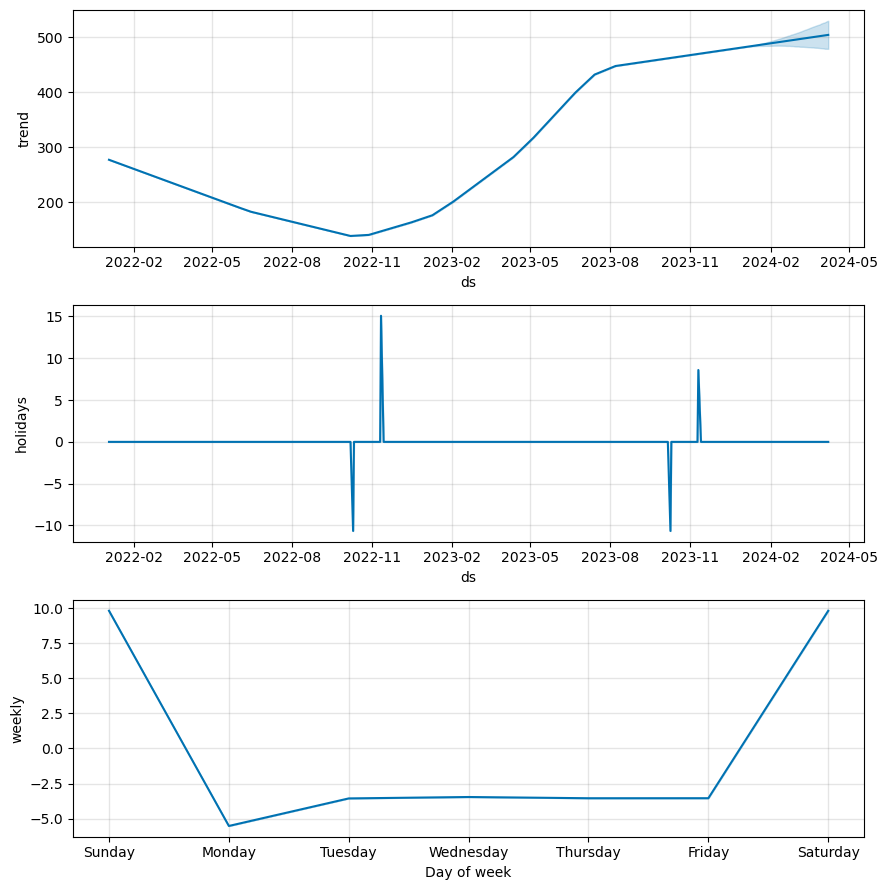

In [12]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

You can also add manual holidays by providing a `holidays` DataFrame


In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,276.989449,245.067303,299.714833,276.989449,276.989449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-5.524377,-5.524377,-5.524377,0.0,0.0,0.0,271.465072
1,2022-01-04,276.404435,245.916908,300.718852,276.404435,276.404435,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.560467,-3.560467,-3.560467,0.0,0.0,0.0,272.843968
2,2022-01-05,275.819421,244.390256,299.755232,275.819421,275.819421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.460284,-3.460284,-3.460284,0.0,0.0,0.0,272.359137
3,2022-01-06,275.234406,242.419693,296.066275,275.234406,275.234406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.547529,-3.547529,-3.547529,0.0,0.0,0.0,271.686877
4,2022-01-07,274.649392,244.682318,299.589258,274.649392,274.649392,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.545380,-3.545380,-3.545380,0.0,0.0,0.0,271.104012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2024-04-03,503.679808,465.887092,534.330511,479.405026,527.460241,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.460284,-3.460284,-3.460284,0.0,0.0,0.0,500.219524
597,2024-04-04,503.912230,464.995381,536.124121,479.336380,528.285242,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.547529,-3.547529,-3.547529,0.0,0.0,0.0,500.364701
598,2024-04-05,504.144652,462.125695,537.050197,479.345326,529.139402,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.545380,-3.545380,-3.545380,0.0,0.0,0.0,500.599272
599,2024-04-06,504.377075,475.911665,551.821941,479.285901,529.917492,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.819026,9.819026,9.819026,0.0,0.0,0.0,514.196101


In [28]:
thanksgiving = pd.DataFrame(
    {
        "holiday": "thanksgiving",
        "ds": pd.to_datetime(["2022-11-23", "2023-11-23"]),
        "lower_window": 0,
        "upper_window": 1,
    }
)

m = Prophet(holidays=thanksgiving)
# m.add_country_holidays(country_name='US')
m.fit(p_df)

12:08:54 - cmdstanpy - INFO - Chain [1] start processing
12:08:54 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
thanksgiving

,holiday,ds,lower_window,upper_window
0,thanksgiving,2022-11-23,0,1
1,thanksgiving,2023-11-23,0,1


Let's check the impact of a holiday simply by checking if we have positive or negative correlations in our prediction dataframe.


In [30]:
forecast = m.predict(future)

In [31]:
forecast[forecast["ds"] == "2022-11-24"]["thanksgiving"]

Series([], Name: thanksgiving, dtype: float64)

In [32]:
forecast.thanksgiving.value_counts()

thanksgiving
0.000000     400
12.125658      1
Name: count, dtype: int64

## Multi-variate forecasting

Sometimes, you might want to create forecast not only with times but with also other variables. Prophet calls it Regressors. To add a regressor, you can simply do:


In [35]:
# Get the data of Microsoft Stock
msft = yf.download("MSFT", "2022-01-01", "2024-01-01")

# Preprocess the data
msft = pd.DataFrame({"ds": msft.index, "msft_stock_price": msft["Open"]}).reset_index(
    drop=True
)


msft.head()

[*********************100%%**********************]  1 of 1 completed


,ds,msft_stock_price
0,2022-01-03,335.350006
1,2022-01-04,334.829987
2,2022-01-05,325.859985
3,2022-01-06,313.149994
4,2022-01-07,314.149994


Let's incorporate this column in our DataFrame


In [36]:
p_df["msft_stock_price"] = msft["msft_stock_price"]
p_df.head()

,ds,y,msft_stock_price
0,2022-01-03,298.149994,335.350006
1,2022-01-04,302.769989,334.829987
2,2022-01-05,289.489990,325.859985
3,2022-01-06,276.399994,313.149994
4,2022-01-07,281.410004,314.149994


In [37]:
m = Prophet()
m.add_regressor("msft_stock_price")

However, once you added a regressor, you absolutely need to have it in your train set AND in your predictions. Therefore, let's split our dataset


In [38]:
# Train_test_split
train_size = int(0.8 * len(p_df))


X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

X_train.head()

,ds,y,msft_stock_price
0,2022-01-03,298.149994,335.350006
1,2022-01-04,302.769989,334.829987
2,2022-01-05,289.489990,325.859985
3,2022-01-06,276.399994,313.149994
4,2022-01-07,281.410004,314.149994


In [39]:
m.fit(X_train)

12:21:40 - cmdstanpy - INFO - Chain [1] start processing
12:21:40 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\prophet\plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



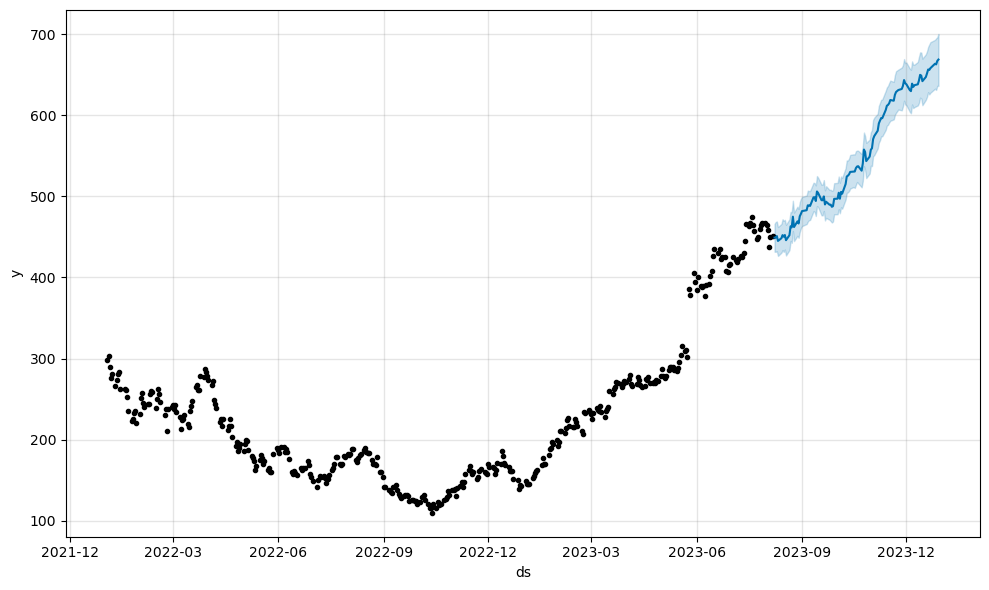

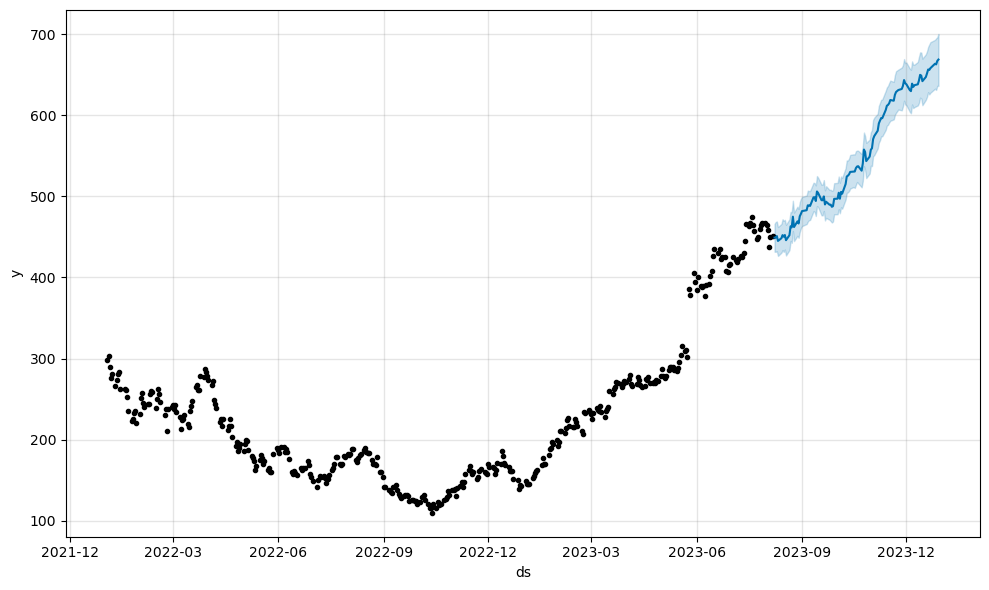

In [40]:
# Forecast
forecast = m.predict(X_test)

# Viz
m.plot(forecast)

In [41]:
future = m.make_future_dataframe(periods=1)
future

,ds
0,2022-01-03
1,2022-01-04
2,2022-01-05
3,2022-01-06
4,2022-01-07
...,...
396,2023-08-02
397,2023-08-03
398,2023-08-04
399,2023-08-07


In [42]:
fig = px.scatter(p_df, x="ds", y="y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig["data"][1]["line"]["color"] = "#4BE8E0"
fig.show()

## Resources

- [Seasonality, Holiday Effects, And Regressors](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors)
- [Forecasting at Scale](https://peerj.com/preprints/3190/)
- [Introduction to Time Series Analysis](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm)
- [Time Series](https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.)
